# One dimensional advection using a Semi-Lagrangian scheme

This notebook makes use of the SemiLagrangian1D class located in src/SemiLagrangian.py to integrate the one dimensional advection equation in time. We consider the advection equation of the form:

$$ \frac{\partial F(x,t)}{\partial t} + c_a \frac{\partial F(x,t)}{\partial x} = 0$$

where $c_a$ is the advection speed. 

### Problem setup

In [7]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
from src.SemiLagrangian import SemiLagrangian1D
rc('animation', html='html5')

A spatial grid in the domain $[0,L]$ with grid point distance $\Delta x$ is defined. As we use periodic boundary conditions we use for $L$ a multiple of $2\pi$, to maintain the periodicity of the sine function.
We also give some numerical value for the advection speed, time step size and number of time steps. The Courant number $\mu = c_a \frac{\Delta t}{\Delta x}$ is calculated. The Semi-Lagrangian scheme should work for $\mu < 1 $, as finite difference methods (e.g. central differences do), but also for $\mu \geq 1 $

In [2]:
L = 4*np.pi # Domain length
NX = 1000 # Number of grid points
X = np.linspace(0,L,num=NX) # Array of grid points
DX = X[1] - X[0] # spatial grid point distance
DT = 0.01 # time step size
NT = 1000 # number of time steps
CA = 1 # advection speed
print('Courant= ' + str(CA*DT/DX))

Courant= 0.7949789407440173


### Initial conditions

The next step is to define an initial setup, i.e. define $F(x,t=0)$. We use two different types here: a step function and a sine function. 

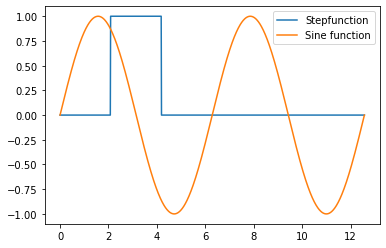

In [3]:
# Step function 
F_ini1 = np.zeros(X.shape[0])
F_ini1[int(X.shape[0]/6):int(2*X.shape[0]/6)] = 1 
# Sine function
F_ini2 = np.sin(X)

# Plotting
plt.plot(X,F_ini1,label='Stepfunction')
plt.plot(X,F_ini2,label='Sine function')
plt.legend()

In order to keep track of $F(x,t)$ at all times and positions we create a two dimensional array, that stores $F(x)$ for specific times (given by the time step size). Then we can create a SemiLagrangian-object that can handle all the integration using the Semi-Lagrangian scheme.
We choose the second initial condition in this example, but you can simply change it to the step function or any other initial condition you want.

In [4]:
# Create array for storing evolution of F(x,t)
F_arr = np.zeros([NT,X.shape[0]])
F_arr[0,:] = np.copy(F_ini2)
# Create SemiLagrangian object
sl = SemiLagrangian1D(X,F_arr[0,:],CA,DT)

## Time integration 
The functionality of the SemiLagrangian model now includes evolving the given initial condition using linear or cubic interpolation. We store each time step to create an animation of the evolution later. One can also change the parameter of the evolve function, if the intermediate time steps are not interesting to the problem.

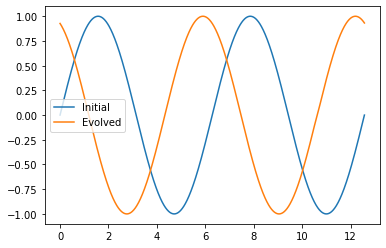

In [13]:
# Calculate the variable for all time steps using semi-lagrangian
for i in range(1,NT):
    F_arr[i,:] = sl.cubic_evolve(nt=1)
    #print(F_arr[i,:])

# Plot initial vs. evolution
plt.plot(X,F_arr[0,:],label='Initial')
plt.plot(X,F_arr[100,:],label='Evolved')
plt.legend()

### Animation
Since we stored $F(x,t)$ for each discrete time step $t_j = j \Delta t$, we can now plot the time evolution of $F(x,t)$.

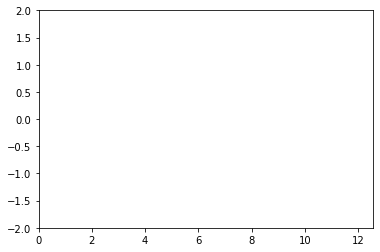

In [6]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, L), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    F = F_arr[i,:]
    line.set_data(X,F)
    return line,

# create animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=NT, interval=20, blit=False)
HTML(anim.to_html5_video())